In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit # this is the logistic function

In [3]:
def piecewise_linear_approximation(x, segments):
    # Range of the function to be approximated
    x_range = [-7, 7]
    # Width of each segment
    segment_width = (x_range[1] - x_range[0]) / segments
    
    # For each x, find which segment it belongs to and calculate the corresponding y
    y = np.zeros_like(x)
    for i in range(segments):
        # Compute the boundaries, slope and intercept for the current segment
        x1 = x_range[0] + i * segment_width
        x2 = x1 + segment_width
        y1, y2 = expit([x1, x2])
        slope = (y2 - y1) / (x2 - x1)
        intercept = y1 - slope * x1
        
        # Apply the piecewise linear approximation for the current segment
        mask = (x >= x1) & (x <= x2)
        y[mask] = slope * x[mask] + intercept
        
    return y

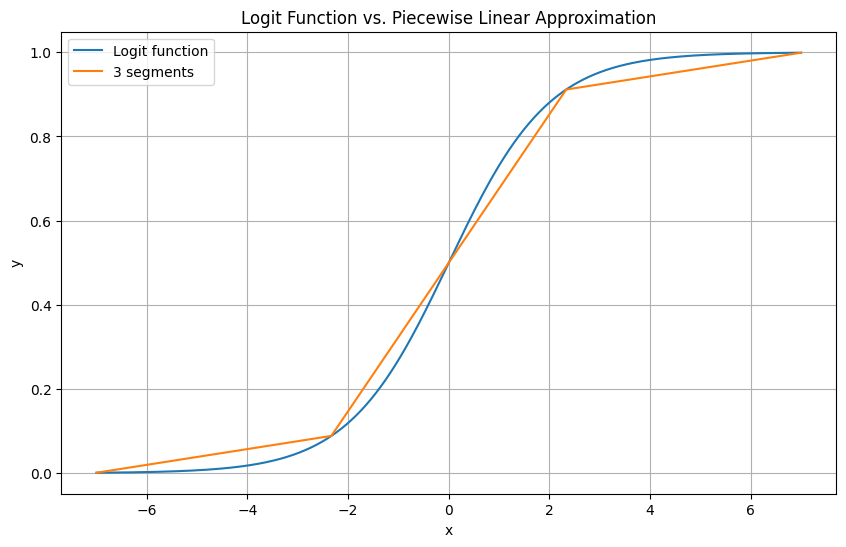

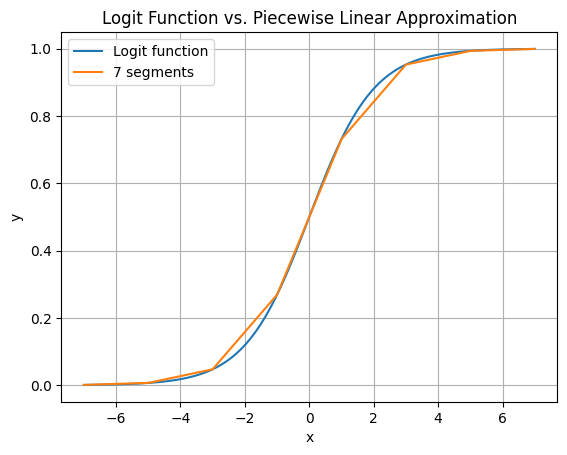

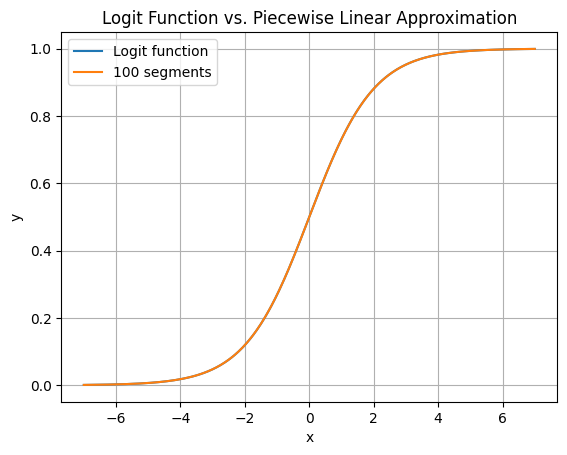

In [12]:
x_values = np.linspace(-7, 7, 1000)
logit_values = expit(x_values)

plt.figure(figsize=(10, 6))

for segments in [3, 7, 100]:
    plt.plot(x_values, logit_values, label="Logit function")
    approx_values = piecewise_linear_approximation(x_values, segments)
    plt.plot(x_values, approx_values, label=f"{segments} segments")
    plt.title("Logit Function vs. Piecewise Linear Approximation")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()